# Machine Learning Prediction

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Load Data
data = pd.read_csv('dataset_part_1.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
inputs = pd.read_csv('dataset_part_2.csv')
inputs.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = data['Class'].to_numpy()

In [6]:
# Scale the inputs
scaler = StandardScaler()
x = scaler.fit_transform(inputs)
x

array([[-1.71291154,  0.        , -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.67441914, -1.18972425, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.63592675, -1.15742336, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63592675,  2.01380177,  3.49060516, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.67441914,  2.01380177,  1.00389436, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.71291154, -0.51905572, -0.65391284, ..., -0.21566555,
        -0.18569534,  9.43398113]])

In [7]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((72, 80), (18, 80))

## Model Data

In [10]:
MLA = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

cv_split = KFold(n_splits = 20, shuffle = True, random_state = 42)

# create Data Frame to compare ML ALgorithms
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean']
ML_table = pd.DataFrame(columns = MLA_columns)

# create data frame to compare ML algorithms predictions
ML_predict = pd.DataFrame(y_test.copy(), columns = ['actual values'])

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    ML_table.loc[row_index, 'MLA Name'] = MLA_name
    ML_table.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = cross_validate(estimator = alg, X = x_train, y = y_train, cv = cv_split, return_train_score = True)

    ML_table.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    ML_table.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()

    alg.fit(x_train, y_train)
    ML_predict[MLA_name] = alg.predict(x_test)

    row_index += 1

ML_table.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
ML_table

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean
9,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.0,0.845833
11,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.841667
12,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.996345,0.841667
5,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.8
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",1.0,0.7875
8,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.97809,0.783333
3,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.959069,0.775
10,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",1.0,0.770833
4,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.75
7,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",1.0,0.741667


In [15]:
ML_predict.sample(10)

,actual values,LogisticRegression,GaussianNB,KNeighborsClassifier,SVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,XGBClassifier
17,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13,1,1,1,1,1,1,0,1,1,1,1,1,1,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
14,1,1,0,1,0,1,0,0,0,0,0,0,0,1


Text(0, 0.5, 'Algorithm')

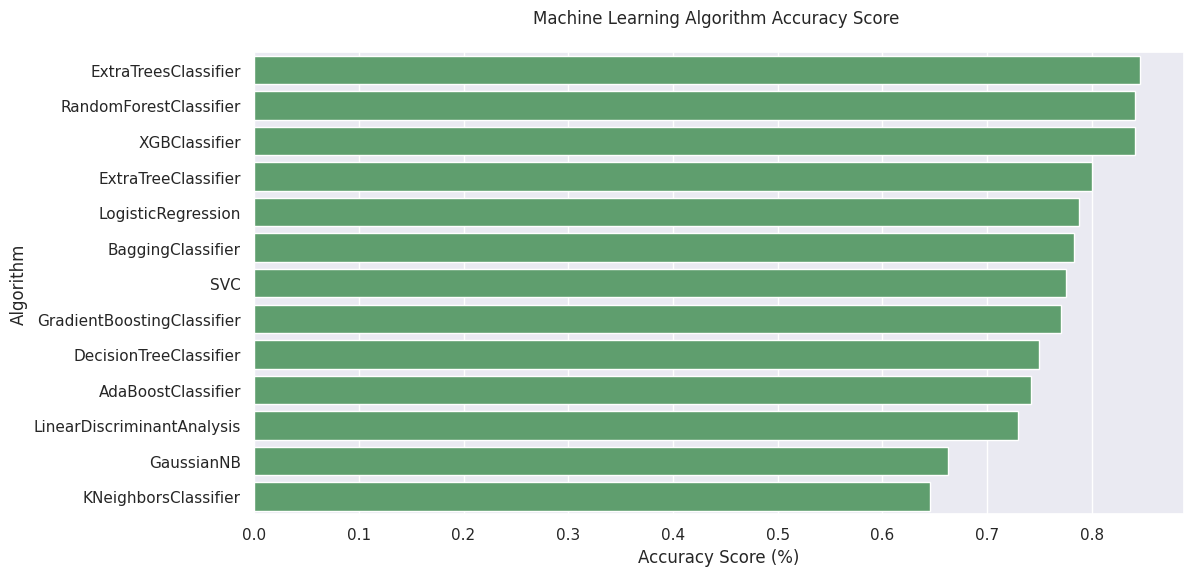

In [16]:
plt.figure(figsize = (12, 6))
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = ML_table, color = 'g')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## HyperParameter Tuning

### GradientBoostingClassifier

In [18]:
params = {
          'loss': ['log_loss', 'exponential'],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
          'n_estimators': [50, 100, 150, 200, 300],
          'criterion': ['friedman_mse', 'squared_error'],
          'max_features': ['sqrt', 'log2']
          }
gs = GridSearchCV(GradientBoostingClassifier(), param_grid = params, n_jobs = -1, cv = cv_split, scoring = 'accuracy')
gs.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='accuracy')

In [19]:
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 150}
accuracy : 0.8541666666666666


In [20]:
print('accuracy = ', gs.score(x_test, y_test))

accuracy =  0.8888888888888888


In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

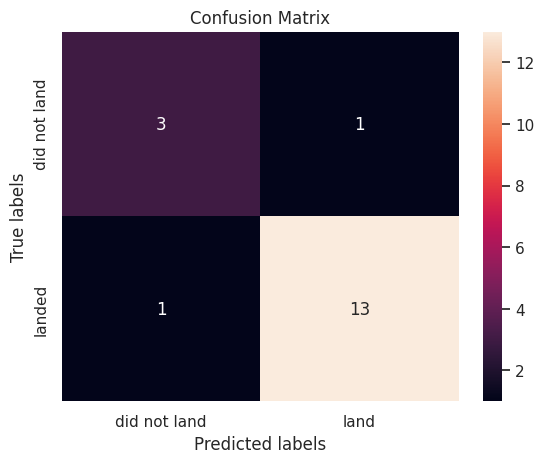

In [25]:
yhat = gs.predict(x_test)
plot_confusion_matrix(y_test, yhat)

### Support Vector Machine

In [30]:
params = [
    {'C': np.arange(1.0, 100.0, 1.0),
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
    },
    {
    'C': np.arange(1.0, 100.0, 1.0),
    'kernel': ['linear', 'sigmoid'],
    }
]
gs_svm = GridSearchCV(SVC(), param_grid = params, n_jobs = -1, cv = cv_split, scoring = 'accuracy')
gs_svm.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 6...
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98., 99.]),
                          'kernel': ['linear', 'sigmoid']}],
             scoring='accuracy')

In [31]:
print("tuned hpyerparameters :(best parameters) ",gs_svm.best_params_)
print("accuracy :",gs_svm.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'kernel': 'sigmoid'}
accuracy : 0.8541666666666666


In [32]:
print('accuracy = ', gs_svm.score(x_test, y_test))

accuracy =  0.9444444444444444


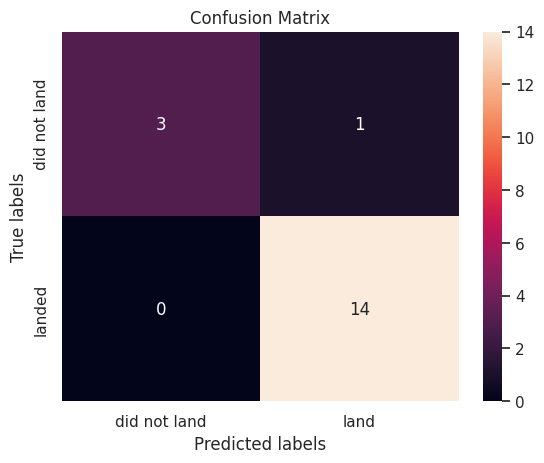

In [33]:
yhat = gs_svm.predict(x_test)
plot_confusion_matrix(y_test, yhat)

### K-nearest Neighbors Classifier

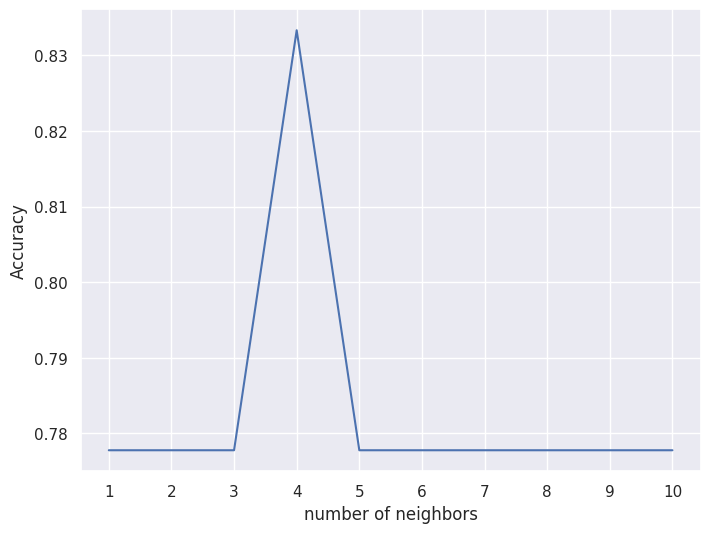

In [36]:
# calculating the accuracy of the models with different of K
mean_acc = np.zeros(10)
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_hat)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11),mean_acc)
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [37]:
params = {
    'n_neighbors': np.arange(1,11,1),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid = params, n_jobs = -1, cv = cv_split, scoring = 'accuracy')
gs_knn.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
train accuracy : 0.825
test accuracy =  0.8888888888888888
confusion matrix: 



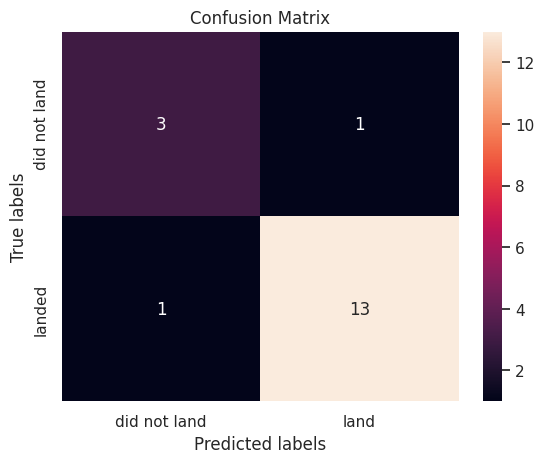

In [40]:
print("tuned hpyerparameters :(best parameters) ",gs_knn.best_params_)
print("train accuracy :",gs_knn.best_score_)
print('test accuracy = ', gs_knn.score(x_test, y_test))
yhat = gs_knn.predict(x_test)
print('confusion matrix: \n')
plot_confusion_matrix(y_test, yhat)

### Logistic Regression

In [41]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}
gs_log = GridSearchCV(LogisticRegression(), param_grid = params, n_jobs = -1, cv = cv_split, scoring = 'accuracy')
gs_log.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

tuned hpyerparameters :(best parameters)  {'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
train accuracy : 0.8416666666666666
test accuracy =  0.9444444444444444
confusion matrix: 



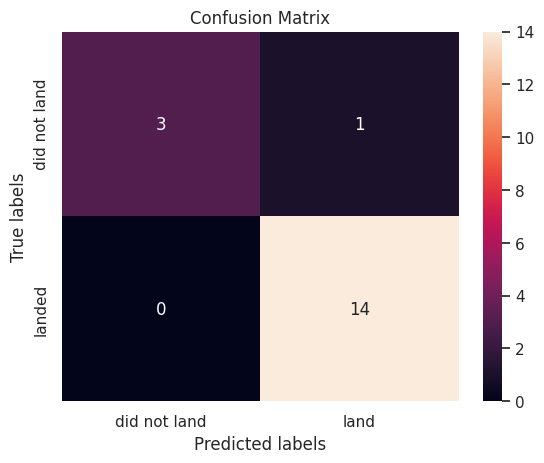

In [44]:
print("tuned hpyerparameters :(best parameters) ",gs_log.best_params_)
print("train accuracy :",gs_log.best_score_)
print('test accuracy = ', gs_log.score(x_test, y_test))
yhat = gs_log.predict(x_test)
print('confusion matrix: \n')
plot_confusion_matrix(y_test, yhat)

### Decision Tree Classifier

In [46]:
params = {'criterion': ['gini', 'entropy'],
            'max_depth': [2,4,6,8,10,None],
            'random_state': [0]
            }
gs_tree = GridSearchCV(DecisionTreeClassifier(), param_grid = params, n_jobs = -1, cv = cv_split, scoring = 'accuracy')
gs_tree.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'random_state': [0]},
             scoring='accuracy')

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'random_state': 0}
train accuracy : 0.8416666666666666
test accuracy =  0.8888888888888888
confusion matrix: 



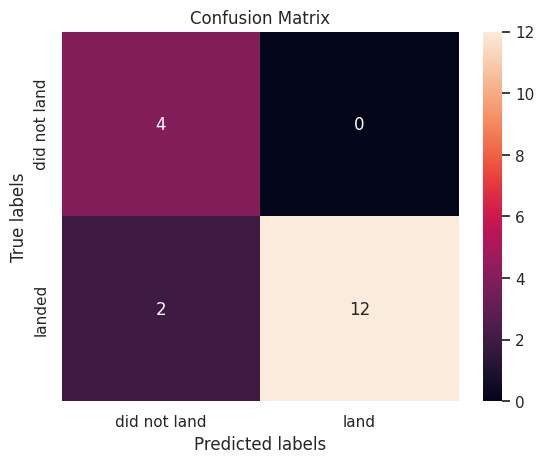

In [47]:
print("tuned hpyerparameters :(best parameters) ",gs_tree.best_params_)
print("train accuracy :",gs_tree.best_score_)
print('test accuracy = ', gs_tree.score(x_test, y_test))
yhat = gs_tree.predict(x_test)
print('confusion matrix: \n')
plot_confusion_matrix(y_test, yhat)

### XGBoost Classifier

In [10]:
cv_split = KFold(n_splits = 10, shuffle = True, random_state = 42)
params = {
            'max_depth':  np.arange(1, 14, dtype=int),
            'min_child_weight': np.arange(1, 6, 1),
            'gamma': np.arange(0.5, 1, 0.05),
          }

gs_xgb = GridSearchCV(XGBClassifier(n_estimators = 140, subsample = 0.8, colsample_bytree = 0.8,
                                    eval_metric = 'auc', objective = 'binary:logistic', nthread = 4,
                                   booster = 'gbtree', tree_method = 'exact', silent = 1 , seed = 42),
                       param_grid = params, n_jobs = 4, cv = cv_split, scoring = 'accuracy')
gs_xgb.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'gamma': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                         'min_child_weight': array([1, 2, 3, 4, 5])},
             scoring='accuracy')

tuned hpyerparameters :(best parameters)  {'gamma': 0.5, 'max_depth': 1, 'min_child_weight': 4}
train accuracy : 0.8482142857142858
test accuracy =  0.8888888888888888
confusion matrix: 



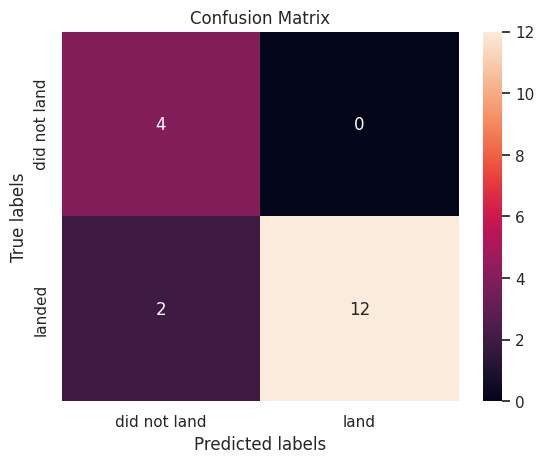

In [13]:
print("tuned hpyerparameters :(best parameters) ",gs_xgb.best_params_)
print("train accuracy :",gs_xgb.best_score_)
print('test accuracy = ', gs_xgb.score(x_test, y_test))
yhat = gs_xgb.predict(x_test)
print('confusion matrix: \n')
plot_confusion_matrix(y_test, yhat)

### **The best model is GradientBoostingClassifier, which was achieved after hyperparameterization of 85% training and 88% test data, and it is the least overfitting algorithm, so it is the best so far.**